## Exercise 1: Hypothesis testing the coefficients from the model in 3.2.1

Table 3.4 has the following information

In [1]:
import pandas as pd

data = {'Coefficient': [2.939, 0.046, 0.189, -0.001],
        'Std. Error': [0.3119, 0.0014, 0.0086, 0.0059],
        't-statistic': [9.42, 32.81, 21.89, -0.18],
        'p-value': [0.0001, 0.0001, 0.0001, 0.8599]}
index = ['Intercept', 'TV', 'radio', 'newspaper']
table = pd.DataFrame(data, index=index)
table.head()

,Coefficient,Std. Error,t-statistic,p-value
Intercept,2.939,0.3119,9.42,0.0001
TV,0.046,0.0014,32.81,0.0001
radio,0.189,0.0086,21.89,0.0001
newspaper,-0.001,0.0059,-0.18,0.8599


The p-values for `Intercept`, `TV` and `radio` coefficients are small enough to reject the null hypotheses for these coefficient, thus accepting the alternative hypotheses that 

- In the absence of `TV` and `radio` ad spending there will be 2,939 units sold
- For each \$1,000 increase in `TV` ad spending another 46 units will sell
- For each \$1,000 increase in `radio` ad spending another 189 units will sell

The p-value for `newspaper` is very high, so in that case we retain the null hypothesis that there is no relationship between newspaper ad spending and sales

## Exercise 2: Differences between KNN classifier and regression methods

Both methods look at a neighborhood $N_0$ of the $K$ points nearest a point $x_o$. 

The KNN classifier estimates the conditional probability of of a class $j$ based on the fraction of observations in the neighborhood of $x_0$ such that are in class $j$. It then predicts $y_0$ to be the class that maximizes this probability (using Bayes rule). Thus, the KNN classifier predicts a qualitative response (a discrete finite RV)

The KNN regression method, however, predicts the response value $y_0$ based on the average response value $\overline{y}$ of all observations in the neighborhood $N_0$. Thus, KNN regression predicts a quantitative response (a continuous RV).

## Exercise 3: Regressing `Salary` on `GPA`, `IQ`, and `Gender`

We have predictors

$$
\begin{align*}
X_1 &= GPA\\
X_2 &= IQ\\
X_3 &= Gender\\
X_4 &= X_1X_2\\
X_5 &= X_1X_3
\end{align*}
$$

And response

$$ Y = Salary$$

where *Salary* means salary after graduation in units of $1,000.

Ordinary least squares (OLS) gives the estimated coefficients

$$
\begin{align*}
\hat{\beta}_0 &= 50\\
\hat{\beta}_1 &= 20\\
\hat{\beta}_2 &= 0.07\\
\hat{\beta}_3 &= 35\\
\hat{\beta}_4 &= 0.01\\
\hat{\beta}_5 &= -10\\
\end{align*}
$$

### (a) 

For a fixed value of IQ and GPA, $X_1, X_2$ are fixed and $X_3$ is variable. In this case we can write the model

$$\hat{Y} = a + b X_3 $$

where we have absorbed the fixed values into

$$
\begin{align*}
a &= \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_4 X_1X_2\\
b &= \beta_3 + \beta_5 X_1
\end{align*}
$$

For simplicity, assume values of 3.0 for GPA and 110 for IQ. Then we find

In [2]:
a = 50 + 20*3.0 + 0.07*110 + 0.01*3.0*110
b = 35 + -10*3.0
a, b

(121.0, 5.0)

So for the $i$-th person, the model predicts

$$\hat{y}_i = 121 + 5x_{i3}$$

and since $X_3$ is an indicator variable, the model predicts a salary of

$$
\hat{y}_i = 
\begin{cases} 
126 &= \text{i-th person is female}\\ 
121 &= \text{i-th person is female}
\end{cases}
$$

so for a fixed $GPA$ and $IQ$, (answer ii) is correct. 

NB: The actual values for salary here depended on our assumed values for IQ and GPA.

### (b)

In [3]:
a = 50 + 20*4.0 + 0.07*110 + 0.01*4.0*110
b = 35 + -10*4.0
print("The predicted salary for a female with an IQ of 110 and a GPA of 4.0 is ${} thousand".format(a + b))

The predicted salary for a female with an IQ of 110 and a GPA of 4.0 is $137.1 thousand


### (c)

The magnitude of a coefficient describes the magnitude of the effect, but not the evidence for it, which comes from the p-value of the hypothesis test for the coefficient. It's possible to have a large coefficient but weak evidence (large p-value) and conversely a small coefficient but strong evidence (small p-value).

So as stated, the answer here is false (that is, it's false as a conditional statement).

## Exercise 4: Linear Vs. Non-linear Train and Test RSS

### (a)

If by "expect" we mean, averaged over many datasets, then the answer is that the linear model should have a lower train RSS.

### (b) 

Same answer as (a)

### (c) 

If the true relationship is non-linear but unknown, then we don't have enough information to say. For example the relationship could be "close to linear" (e.g. quadratic with extremely small $X^2$ coefficient, or piecewise linear) in which case on average we would expect better performance from the linear model. Or it could be polynomial of degree 3 or greater, in which case we'd expect the cubic model to perform better.

### Testing my answers

In this section, I'm going to use simulation to test my answers.

In [4]:
# setup
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from tqdm import tqdm_notebook

In [5]:
# generate coefficients for random linear function
def random_true_linear():
    coeffs = 20e3 * np.random.random_sample((2,)) - 10e3
    def f(x):
        return coeffs[1] + coeffs[0] * x
    return f

In [11]:
# generate n data points according to linear relationship
def gen_data(n_sample, true_f):
    # initialize df with uniformly random input
    df = pd.DataFrame({'x': 20e3 * np.random.random_sample((n_sample,)) - 10e3})
    # add linear outputs and noise
    df['y'] = df['x'].map(true_f) + np.random.normal(size=n_sample)**3
    # return df
    return df

In [12]:
# get test and train RSS from linear and cubic models from random linear function
def test_run(n_sample):
    # random linear function
    true_linear = random_true_linear()

    # generate train and test data
    train, test = gen_data(n_sample, true_linear), gen_data(n_sample, true_linear)

    # fit models
    linear_model = smf.ols('y ~ x', data=train).fit()
    cubic_model = smf.ols('y ~ x + I(x**2) + I(x**3)', data=train).fit()

    # get train RSSes
    linear_train_RSS, cubic_train_RSS = (linear_model.resid**2).sum(), (cubic_model.resid**2).sum()

    # get test RSSes
    linear_test_RSS = ((linear_model.predict(exog=test['x']) - test['y'])**2).sum()
    cubic_test_RSS =  ((cubic_model.predict(exog=test['x']) - test['y'])**2).sum()

    # create df and add test and train RSS
    df = pd.DataFrame(columns=pd.MultiIndex.from_product([['linear', 'cubic'], ['train', 'test']]))
    df.loc[0] = np.array([linear_train_RSS, linear_test_RSS, cubic_test_RSS, cubic_train_RSS])

    return df

In [13]:
# sample size, number of tests
n_sample, n_tests = 100, 1000

# dataframe for results
results = pd.DataFrame(columns=pd.MultiIndex.from_product([['linear', 'cubic'], ['train', 'test']]))

# iterate
for i in tqdm_notebook(range(n_tests)):
    results = results.append(test_run(n_sample), ignore_index=True)

In [18]:
results.head()

linear                     cubic             
         train         test        train         test
0  1586.209472  2746.762638  2990.943079  1490.689694
1   691.867975   567.483756   586.850022   687.043502
2  3006.376688  1306.298281  1337.048066  2981.928496
3  1159.712782  2207.674753  2211.288146  1124.359569
4  1091.879593  1695.663868  1726.829296  1084.274033

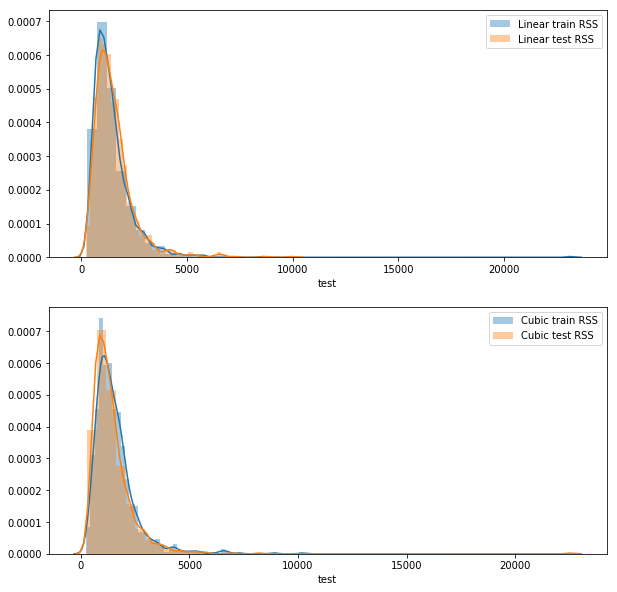

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
sns.distplot(results.linear.train, label="Linear train RSS")
sns.distplot(results.linear.test, label="Linear test RSS")
plt.legend()

plt.subplot(2, 1, 2)
sns.distplot(results.cubic.train, label="Cubic train RSS")
sns.distplot(results.cubic.test, label="Cubic test RSS")
plt.legend()

Not what I expected!

- For the linear model, the test RSS is greater than the train RSS
- For the cubic model, the train RSS is greater than the test RSS
- The linear train RSS is less than the cubic train RSS
- The linear test RSS is greater than the cubic test RSS

In light of these results, I don't know how to answer this question

TODO

- keep prediction results and use sklearn to evaluate performance
- visualize (diagnostic plots) to make sure data is really linear

## Exercise 5: The fitted values are linear combinations of the response values.

We have

$$
\begin{align*}
\hat{y}_i &= x_i\hat{\beta}\\
&= x_i\left(\frac{\sum_{i} x_iy_i}{\sum_{j} x_{i'}^2}\right)\\
&= \frac{1}{\sum_{j} x_{j}^2}\left( x_i \left(\sum_{i} x_iy_i\right)\right)\\
&= \frac{1}{\sum_{j} x_{j}^2}\left(\sum_{i'}x_ix_{i'}y_{i'}\right)\\
&= \sum_{i'}\left(\frac{x_ix_{i'}}{\sum_{j} x_{j}^2}\right)y_{i'}\\
&= \sum_{i'} a_{i'}y_{i'}\\
\end{align*}
$$

where

$$ a_{i'} = \frac{x_ix_{i'}}{\sum_{j} x_{j}^2}$$

## Exercise 6: Least squares line in simple regression passes through the sample means

Equation (3.4) in the text shows that, in simple regression the coefficients satisfy

$$
\hat{\beta}_0 = \overline{y} - \hat{\beta}_1\overline{x}
$$

The least squares line is $y = \hat{\beta}_0 + \hat{\beta}_1 x$, but by 3.4, 

$$\overline{y} = \hat{\beta}_0 + \hat{\beta}_1 \overline{x}$$

which means $(\overline{x}, \overline{y})$ is on the line

## Exercise 7: $R^2 = r^2$ in simple regression

We have

$$
\begin{align}
R^2 &= \frac{TSS - RSS}{RSS}\\
&= \frac{\sum_i (y_i - \overline{y})^2 - \sum_i (y_i - \hat{y}_i)^2}{\sum_i (y_i - \overline{y})^2}\\
&= \frac{\sum_i (y_i - \overline{y})^2 - \sum_i (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)^2}{\sum_i (y_i - \overline{y})^2}\\
\end{align}
$$

Since

$$
\begin{align}
\hat{\beta}_0 = \overline{y} - \hat{\beta}_1\overline{x}
\end{align}
$$

The right hand term in the numerator of (3) can be rewritten

$$
\begin{align}
 \sum_i (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)^2 & = \sum_i \left(y_i - \overline{y} - \hat{\beta}_1(x_i - \overline{x})\right)^2 \\
 &= \sum_i (y_i - \overline{y})^2 - 2\hat{\beta}_1(y_i - \overline{y})(x_i - \overline{x}) + \hat{\beta}_1^2(x_i - \overline{x})^2\\
\end{align}
$$

substituting (5) into (3) we find

$$
\begin{align}
R^2 &= \frac{\sum_i 2\hat{\beta}_1(y_i - \overline{y})(x_i - \overline{x}) - \hat{\beta}_1^2(x_i - \overline{x})^2}{\sum_i (y_i - \overline{y})^2}\\
&= \frac{1}{\sum_i (y_i - \overline{y})^2}\left(2\hat{\beta}_1\left(\sum_i (y_i - \overline{y})(x_i - \overline{x})\right) - \hat{\beta}_1^2\left(\sum_i(x_i - \overline{x})^2\right)\right)
\end{align}
$$

Since

$$
\begin{align}
\hat{\beta}_1 &= \frac{\sum_j (x_j - \overline{x})(y_j - \overline{y})}{\sum_j(x_j - \overline{x})^2}
\end{align}
$$

We can substitute (7) into (6) to get

$$
\begin{align}
R^2 
&= \frac{1}{\sum_i (y_i - \overline{y})^2}\left(2\left(\left(\frac{\sum_j (x_j - \overline{x})(y_j - \overline{y})}{\sum_j(x_j - \overline{x})^2}\right)\sum_i (y_i - \overline{y})(x_i - \overline{x})\right) - \left(\frac{\sum_j (x_j - \overline{x})(y_j - \overline{y})}{\sum_j(x_j - \overline{x})^2}\right)^2\left(\sum_i(x_i - \overline{x})^2\right)\right)\\
&= \frac{1}{\sum_i (y_i - \overline{y})^2 \sum_j(x_j - \overline{x})^2}\left(2\left(\sum_i\sum_j (x_j - \overline{x})(y_j - \overline{y})(y_i - \overline{y})(x_i - \overline{x})\right) - \sum_i\sum_j (x_j - \overline{x})(y_j - \overline{y})(y_i - \overline{y})(x_i - \overline{x})\right)\\
&= \frac{\sum_i\sum_j(x_i - \overline{x})(y_i - \overline{y})(x_j - \overline{x})(y_j - \overline{y})}{\sum_i (x_i - \overline{x})^2\sum_i (y_i - \overline{y})^2}\\
&= \left(\frac{\sum_i(x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum_i (x_i - \overline{x})^2}\sqrt{\sum_i (y_i - \overline{y})^2}}\right)^2\\
&= r^2
\end{align}
$$